In [ ]:
!nvidia-smi

Sun Feb  4 15:17:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%pip install ultralytics
from IPython import display
display.clear_output()

In [ ]:
from ultralytics import YOLO

!yolo task=detect mode=predict model="yolov8n.pt" source="/content/220px-Flickr_RangersZenit1.jpg"

100% 6.23M/6.23M [00:00<00:00, 68.2MB/s]
Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/220px-Flickr_RangersZenit1.jpg: 448x640 12 persons, 90.3ms
Speed: 13.6ms preprocess, 90.3ms inference, 733.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# import the dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("yolov8-ajpvj").project("rock-paper-scissors-wua3t")
dataset = project.version(1).download("yolov8")

display.clear_output()


In [ ]:
#traind the model
!yolo task=detect mode=train model=yolov8n.pt data="/content/Rock-Paper-Scissors-1/data.yaml" epochs=50 imgsz=800

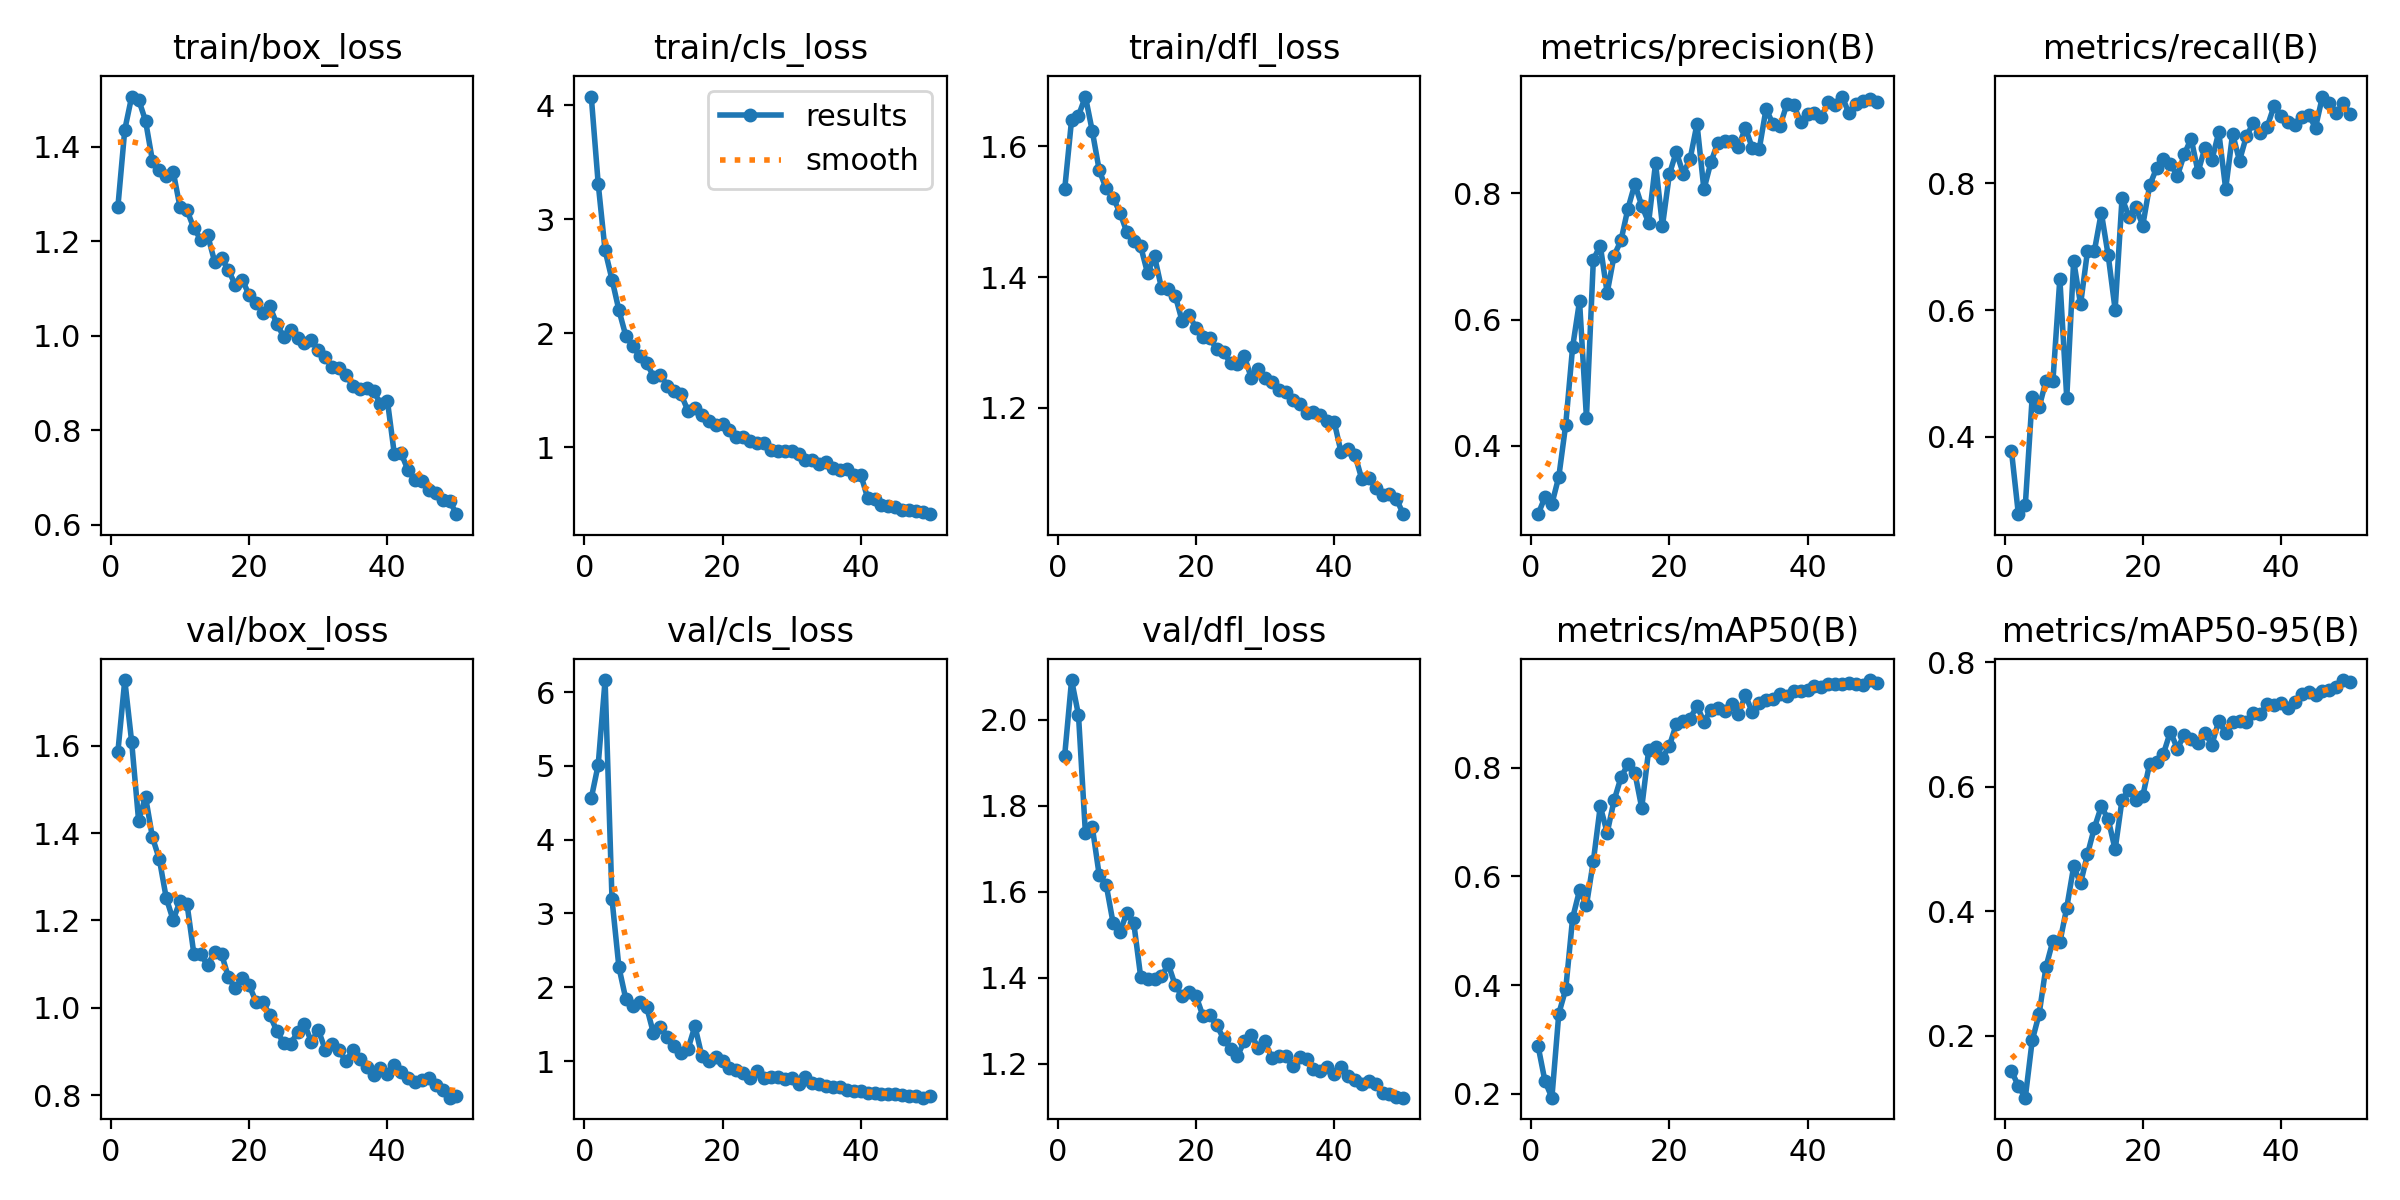

In [ ]:
from IPython.display import Image
Image("/content/runs/detect/train/results.png", height=600)

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" source="/content/Photo on 2024-02-04 at 17.33.jpg"

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Photo on 2024-02-04 at 17.33.jpg: 544x800 1 Paper, 1 Rock, 81.5ms
Speed: 7.1ms preprocess, 81.5ms inference, 488.5ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


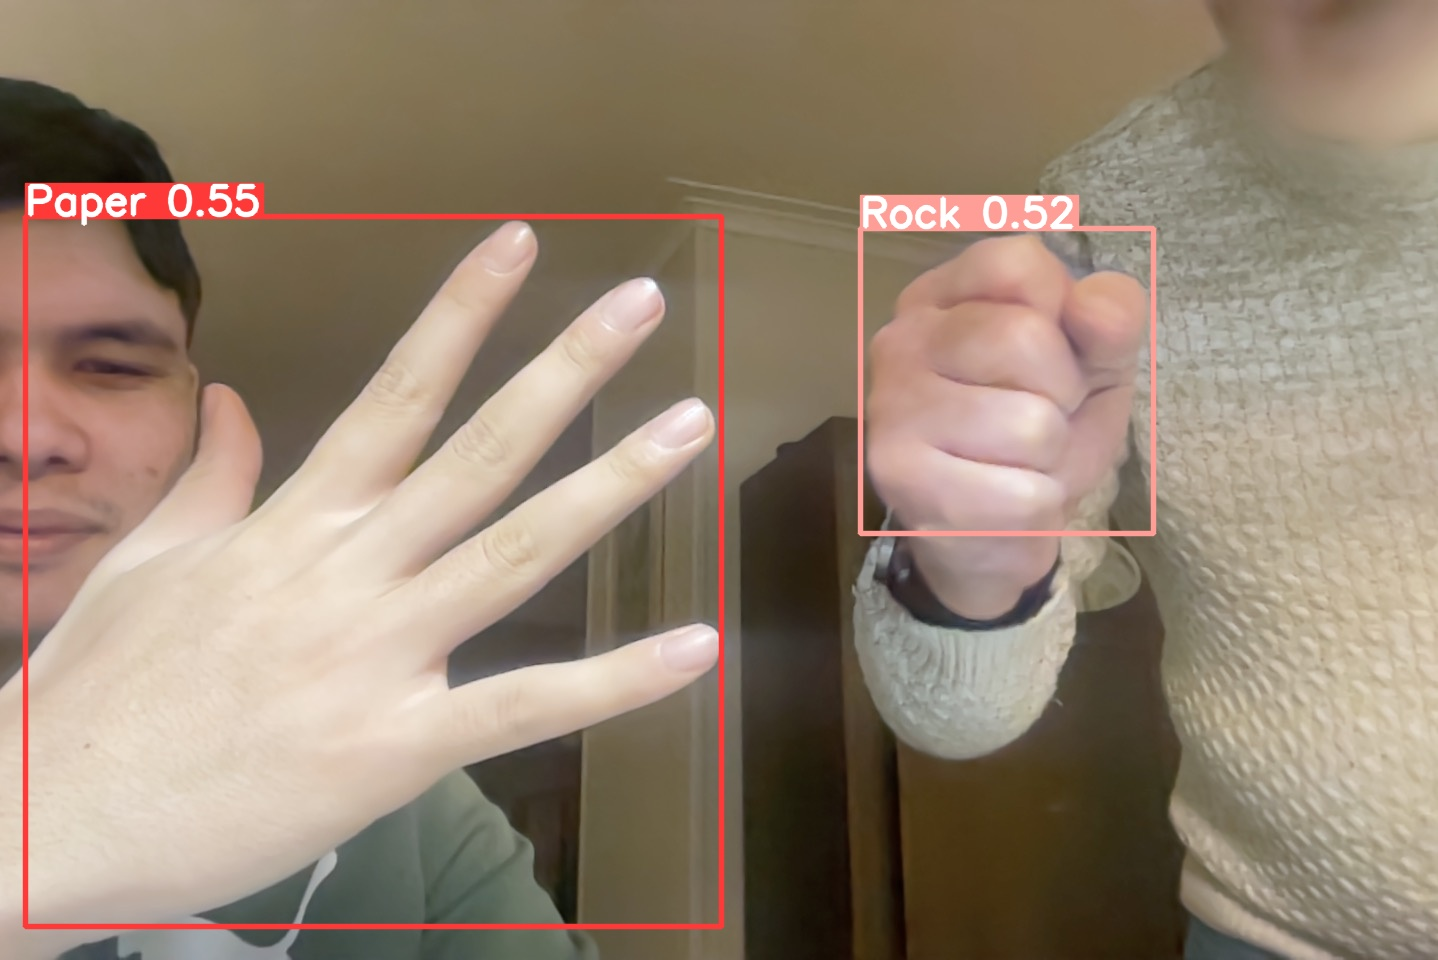

In [ ]:
Image("/content/runs/detect/predict3/Photo on 2024-02-04 at 17.33.jpg", height=600)

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" source="/content/game.mov"

In [34]:
project.version(dataset.version).deploy(model_type= "yolov8", model_path="/content/runs/detect/train")

Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/yolov8-ajpvj/rock-paper-scissors-wua3t/1
Share your model with the world at: https://universe.roboflow.com/yolov8-ajpvj/rock-paper-scissors-wua3t/model/1
